In [1]:
!pip3 install -qU langchain langchain-community langchain-chroma langchain-core langchain-text-splitters langchain-upstage
!pip3 install -qU requests python-dotenv oracledb PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.4/337.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
import oracledb
from langchain_community.vectorstores import oraclevs
from langchain_community.vectorstores.oraclevs import OracleVS

username=os.environ["DB_USER"]
password=os.environ["DB_PASSWORD"]
dsn=os.environ["DSN"]

con = oracledb.connect(user=username, password=password, dsn=dsn)

try:
    conn23c = oracledb.connect(user=username, password=password, dsn=dsn)
    print("Connection successful!", conn23c.version)
except Exception as e:
    print("Connection failed!")

Connection successful! 23.4.1.24.6


No RAG 결과

In [5]:
from langchain_upstage import ChatUpstage

chat = ChatUpstage()
response = chat.invoke("근로기준법과 관련하여 현재 법률 개정된 것이 있어? 개정안을 발의한 사람이나 기존 법률안과의 차이점 등을 설명해줘.")
print(response)

content="현재 근로기준법과 관련된 법률 개정안은 아직 국회에 발의되어 있지 않습니다. 그러나 정부는 최근 근로시간 제도 개선을 위한 법 개정을 추진하고 있습니다.\n\n지난 2018년, 정부는 근로시간 제도 개선을 위한 법 개정을 추진하였습니다. 이 개정안은 주 52시간 근로제를 시행하면서, 근로시간의 유연성을 높이기 위해 '탄력적 근로시간제'와 '선택적 근로시간제'를 확대하는 내용을 담고 있었습니다. 그러나 이 개정안은 국회에서 통과되지 못하고, 현재도 논의 중인 상태입니다.\n\n최근에는 정부가 근로시간 제도 개선을 위한 법 개정을 다시 추진하고 있습니다. 이번 개정안은 '재량근로시간제'와 '특별연장근로' 등을 확대하는 내용을 담고 있습니다. 이 개정안은 근로자의 건강권을 보호하면서도, 기업의 경쟁력을 높이기 위한 것으로 알려져 있습니다.\n\n그러나 이번 개정안도 국회에서 통과되지 못하고, 현재도 논의 중인 상태입니다. 따라서, 현재 근로기준법과 관련된 법률 개정안은 아직 확정되지 않았습니다." response_metadata={'token_usage': {'completion_tokens': 205, 'prompt_tokens': 39, 'total_tokens': 244}, 'model_name': 'solar-1-mini-chat-240612', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-bdfeb3cf-a10f-41e8-b578-3288bab619f9-0' usage_metadata={'input_tokens': 39, 'output_tokens': 205, 'total_tokens': 244}


In [6]:
# import
import os
import sys
from dotenv import load_dotenv
from langchain.chains import ConversationalRetrievalChain
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import CSVLoader
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import Chroma
from langchain_community.vectorstores.utils import DistanceStrategy
from langchain_upstage import UpstageLayoutAnalysisLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter, Language
from langchain_upstage import UpstageEmbeddings
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_upstage import ChatUpstage
import time


In [7]:
# colab 사용 시
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Create a List of Documents from all of our files in the ./docs folder
files = []
for file in os.listdir("/content/drive/MyDrive/Colab Notebooks/temp"):
    file_path = "/content/drive/MyDrive/Colab Notebooks/temp/" + file
    files.append(file_path)
layzer = UpstageLayoutAnalysisLoader(files)

max_retries = 10
retry_delay = 2  # seconds
for attempt in range(max_retries):
    try:
        docs = layzer.load()
        break
    except ValueError as e:
        print(f"Attempt {attempt + 1} failed: {e}")
        if attempt < max_retries - 1:
            time.sleep(retry_delay)
        else:
            print("All attempts failed")
# Split the documents into smaller chunks
text_splitter = RecursiveCharacterTextSplitter.from_language(
    chunk_size=1000, chunk_overlap=100, language=Language.HTML
)
docs = text_splitter.split_documents(docs)


In [ ]:
# Embedding
upstage_embeddings = UpstageEmbeddings(model="solar-embedding-1-large")
knowledge_base = OracleVS.from_documents(docs, upstage_embeddings, client=conn23c,
                    table_name="gyouk",
                    distance_strategy=DistanceStrategy.COSINE)

# Retriever
vector_store = OracleVS(client=conn23c,
                        embedding_function=upstage_embeddings,
                        table_name="gyouk",
                        distance_strategy=DistanceStrategy.COSINE)

retriever = vector_store.as_retriever()



In [10]:
# langchain

from langchain_upstage import ChatUpstage
from langchain_core.messages import HumanMessage, SystemMessage
llm = ChatUpstage()

def invokellm(question, template, vector_store):
    prompt = PromptTemplate.from_template(template)
    vector_store.as_retriever()

    s5time = time.time()
    chain = (
      {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
    )
    response = chain.invoke(question)

    s6time = time.time()
    return response

In [14]:
template = """Adopt the role of [job title(s) of EXPERT in legal field most qualified to provide authoritative, nuanced answer].
Write a response that appropriately answers the question based on the following context.
(If the question asks for information in context, provide all relevant information in a clean, well-organized form.
If not, then do not answer the question.)
### Context: {context}
### Question: {question}
### Response:
"""

In [18]:
user_question = "소상공인기본법에 대한 현재 법률 개정에 대해 설명해줘. 이 개정안이 통과될 것 같아?"
response = invokellm(user_question, template, vector_store)
print(response)

이 문서의 문맥은 소상공인에 대한 정의와 관련된 소상공인기본법의 일부 개정 법률안입니다. 현재 법률 개정의 목적은 소상공인의 범위를 정의하는 데 있어서 상시 근로자 수 요건을 삭제하고, 대신 업종별 평균 매출액을 기준으로 소상공인을 정의하는 것입니다. 이를 통해 정부의 소상공인 지원 정책의 형평성을 제고하려는 것입니다.

이 개정안은 공포 후 6개월이 경과한 날부터 시행되며, 이 법 시행 당시 종전의 소상공인 요건을 충족한 자는 이 법 시행 후 3년간은 소상공인으로 간주됩니다.

개정안에 따르면, 소상공인은 업종별 평균매출액이 대통령령으로 정하는 기준에 해당하는 자로 정의됩니다.

이 개정안이 통과될지 여부는 문서에 언급되지 않았으므로 알 수 없습니다.


In [45]:
user_question = "국가유공자들에게 예우와 지원에 관한 법률 개정 사항이 혹시 있니? 기존 법률에 어떤 변경사항을 말하고 있어??"
response = invokellm(user_question, template, vector_store)
print(response)


국가유공자 등 예우 및 지원에 관한 법률 일부개정법률안이 발의되었습니다. 이 개정안은 6 ㆍ 25전쟁 당시 병역징집 대상 연령이 아니었음에도 불구하고 징집되어 참전한 소년 ㆍ 소녀병들을 국가유공자에 포함시켜 보상 및 교육 ㆍ 취업 ㆍ 의료지원 등에 있어 국가유공자로서의 예우를 갖추도록 하는 내용을 담고 있습니다. 이를 위해 법률 제4조제1항제9호의2를 신설하여 6 ㆍ 25참전 소년소녀병을 정의하고, 제12조, 제15조의2, 제22조, 제29조, 제42조, 제43조의2 및 제44조를 개정하여 소년소녀병에 대한 예우와 지원을 강화하려는 것입니다.


In [58]:
user_question = "수돗물의 수열에너지와 관련해서 수도법 개정안이 있니? 어떤 분이 제안했는지, 기존과 어떤 사항이 다른지 설명해줘."
response = invokellm(user_question, template, vector_store)
print(response)

네, 수돗물의 수열에너지와 관련해서 수도법 개정안이 있습니다. 이 개정안은 위성곤 의원이 제안한 것으로, 수돗물을 수열에너지 생산에 사용하는 경우에도 요금을 할인할 수 있도록 근거 규정을 마련하는 내용을 담고 있습니다. 기존에는 수돗물을 수열에너지 생산에 사용하는 경우에 대한 할인 규정이 없었지만, 이번 개정안을 통해 수열에너지의 생산과 사용을 활성화하고, 수돗물의 열을 변환시켜 얻어지는 수열에너지의 생산에 사용되는 자에 대해 수돗물의 요금을 할인할 수 있도록 하려는 것입니다.


In [19]:
user_question = "근로기준법과 관련하여 현재 법률 개정된 것이 있어? 개정안을 발의한 사람이나 기존 법률안과의 차이점 등을 설명해줘."
response = invokellm(user_question, template, vector_store)
print(response)

근로기준법과 관련하여 현재 법률 개정된 것은 없습니다. 제공된 문맥에는 신에너지 및 재생에너지 개발 이용 보급 촉진법, 고용보험법, 그리고 정부조직법 일부개정법률안에 대한 내용이 포함되어 있습니다. 근로기준법이나 관련된 법률 개정에 대한 내용은 없습니다.

만약 개정안이 발의되었다면, 해당 개정안의 제안을 설명한 의원, 기존 법률안과의 차이점, 그리고 개정안의 목적 등을 알려드릴 수 있습니다. 그러나 문맥에는 근로기준법과 관련된 개정안이 언급되지 않았습니다.


2201387_의사국 의안과_의안원문.pdf - 근로기준법 일부개정법률안
(박정의원 대표발의)

In [22]:
retriever = vector_store.as_retriever()

In [25]:
result_temp = retriever.invoke("근로기준법과 관련하여 현재 법률 개정된 것이 있어? 개정안을 발의한 사람이나 기존 법률안과의 차이점 등을 설명해줘.")
print(result_temp[0].page_content)

<table id='20' style='font-size:18px'><tr><td><신 설></td><td>어민의 안전을 위하여 안전지 침을 수립하는 등 도조례로 정 하는 바에 따라 필요한 조치를 할 수 있다. 제69조의3(도시교통정비에 관한 특례) ① 「도시교통정비 촉진 법」 제3조제1항제2호에 따른 국토교통부장관의 권한은 도지 사의 권한으로 한다. ② 도지사는 「도시교통정비 촉진법」 제3조제1항제2호의 지역을 도시교통정비지역으로 지정하려면 「국가통합교통체 계효율화법」 제110조에 따른 지방교통위원회의 심의를 거쳐 야 한다. ③ 도지사는 제1항 및 제2항에 따라 도시교통정비지역을 지정 ㆍ 고시한 경우에는 국토교통부 장관에게 그 지정 사실을 알려 야 한다. ④ 도지사는 「도시교통정비 촉진법」 제36조제2항에도 불 구하고 도조례로 정하는 바에 따라 같은 법 제3조에 따른 도 시교통정비지역으로 지정 ㆍ 고</td></tr></table>


In [26]:
layzer_temp = UpstageLayoutAnalysisLoader("/content/drive/MyDrive/Colab Notebooks/temp/2201391_의사국 의안과_의안원문.pdf", output_type="html")
docs_temp = layzer_temp.load()


In [32]:
docs_temp[0].page_content[3200:3500]

'환산한 것을 포함한 다) 5. ∼ 12. (생 략) ② ∼ ⑥ (생 략) 제8조(대부업자의 이자율의 제한)</td><td>제6조(대부계약의 체결 등) ① -- ---------------------------- ---------------------------- ---------------------------- ---------------------------- ---------------------------- ---------------. 1. ∼ 3의2. (현행과 같음) 4. ----------- 「이자제한법」 - -----'

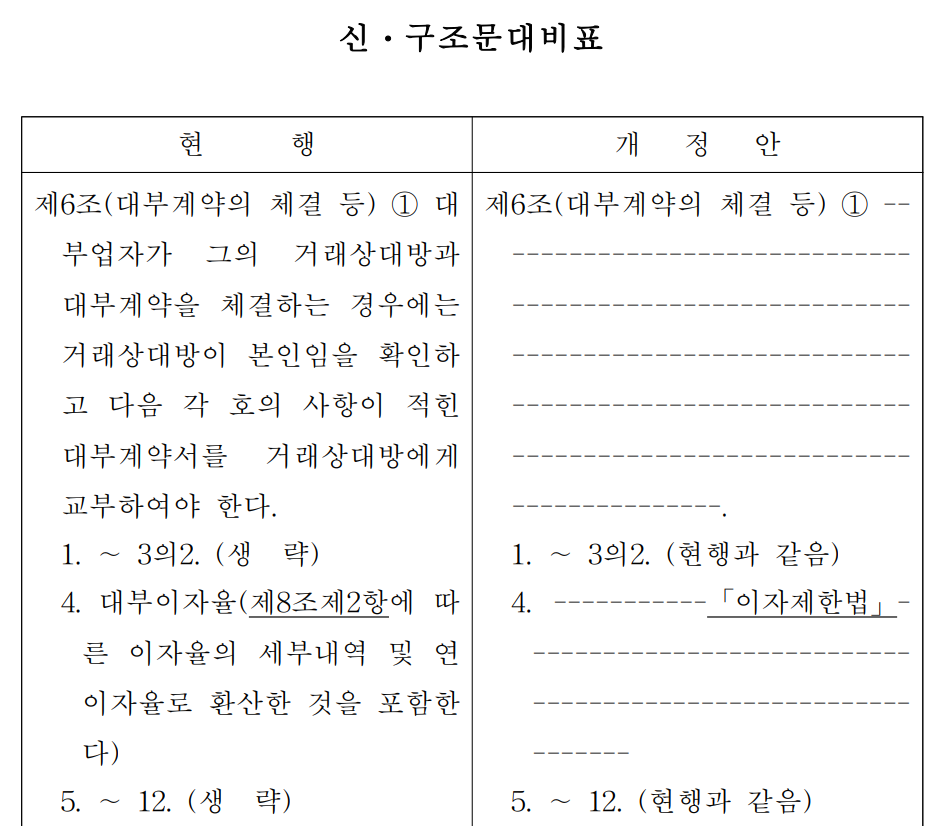

LLM이 이해하기 힘든 구조의 데이터가 문서 상 포함 -> semantic embedding similarity의 오류